In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

In [4]:
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
    )

In [5]:
labels_map = {
    0:"T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",    
}

In [15]:
figure = plt.figure(
    figsize = (8,8)
    )

<Figure size 576x576 with 0 Axes>

In [16]:
cols, rows = 3,3

1
2
3
4
5
6
7
8
9


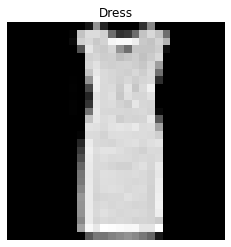

In [19]:
for i in range(1, cols * rows +1):
    sample_idx = torch.randint(
        len(training_data), 
        size = (1,)
        ).item()
    #print(sample_idx)
    img, label = training_data[sample_idx]
    
    figure.add_subplot(rows, cols, i)
    print(i)
    
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap = "gray")

plt.show()

In [20]:
import os
import pandas as pd
from torchvision.io import read_image

In [60]:
class CustomImageDataset(
    Dataset
    ):
    def __init__(
        self,
        annotations_file,
        img_dir,
        transform = None,
        target_transform = None,
        ):
        self.img_labels = pd.read_csv(annotations_file, header = None)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(
        self,
        idx
        ):
        img_path = os.path.join(
            self.img_dir,
            self.img_labels.iloc[idx, 0]
            )
        image = read_image(img_path)
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [61]:
dataset = CustomImageDataset(
    annotations_file = 'images/labels.csv',
    img_dir = 'images',
    )

In [56]:
dataset

In [57]:
len(dataset)

3

In [62]:
dataset[1]

(tensor([[[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]],
 
         [[255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          ...,
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255],
          [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8),
 0)

##### END